## Visualizing the results from the conformer generation

In [3]:
import nglview as nv
from ase.io import write
from mkite_core.models import JobResults, ConformerInfo

In [2]:
results = JobResults.from_json("jobresults.json")
conf = ConformerInfo.from_dict(results.nodes[0].chemnode)
atoms = conf.as_ase()

nv.show_ase(atoms)

NGLWidget()

In [5]:
write("caffeine.xyz", atoms, format="extxyz")

## Running a recipe directly from a Jupyter notebook

In [3]:
from mkite_core.models import JobInfo
from mkite_conformer.recipes.rdkit import ConformerGenerationRecipe

In [4]:
info = JobInfo(**{
    "job": {},
    "recipe": {},
    'options': {'force_field': 'uff'},
    'inputs': [{'smiles': 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'}],
})

In [5]:
recipe = ConformerGenerationRecipe(info)

In [6]:
results = recipe.run()

In [7]:
results

JobResults(job={'status': 'D', 'options': {'force_field': 'uff', 'num_conformers_returned': 20, 'num_conformers_generated': 200, 'num_attempts': 5, 'prune_threshold': 0.1, 'cluster_rmsd_tol': 2.0, 'threads': 1, 'random_seed': 8000914}}, runstats=RunStatsInfo(host='parzival', cluster='parzival', duration=1.211506, ncores=1, ngpus=0, pkgversion='mkite-conformer 0.1.0'), nodes=[NodeResults(chemnode={'species': ['C', 'N', 'C', 'C', 'C', 'O', 'N', 'C', 'C', 'O', 'N', 'C', 'N', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H'], 'coords': [[3.3089036097238487, 0.4300581252918952, 0.04227096507353389], [2.114320240532895, -0.4058057048181734, 0.1044760629739528], [2.0647946827151054, -1.7448103466223894, 0.3111492149538143], [0.7981102747834637, -2.235578043849484, 0.3345047651229771], [0.046452559607323245, -1.1349549255889622, 0.12895883897145988], [0.8267917310225912, -0.03870264014485164, -0.00629201644822572], [0.2563195227756526, 1.2125173681740926, -0.19974421479457877], [0.9831140

## Bypassing the recipe altogether

In [8]:
from mkite_conformer.runners.rdkit import ConformerGenerator

In [9]:
smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
generator = ConformerGenerator.from_smiles(smiles)

In [10]:
mol, energy = generator.run()

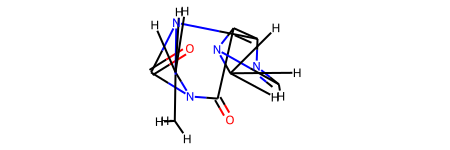

In [11]:
mol